# 임베딩(Embedding)
    - 워드임베딩은 단어를 컴퓨터가 이해하고 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
    - 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현방법이 연구
    - 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델투입도 가능

# 인코딩(Encoding)
    - 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
    - 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
    - 이러한 작업을 인코딩이라고 함
    - 텍스트 처리에서는 주로 정수 인코딩, 원 핫 인코딩을 사용

# 정수 인코딩
    - dictionary를 이용한 정수 인코딩
        - 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [1]:
text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라"

tokens = [x for x in text.split(' ')]
unique = set(tokens)
unique = list(unique)

token2idx = {}
for i in range(len(unique)):
    token2idx[unique[i]] =i
    
encode = [token2idx[x] for x in tokens]
encode

[7, 9, 3, 1, 2, 8, 4, 0, 3, 5, 6]

# keras를 이용한 정수 인코딩
    - 정수 인코딩은 단어에 정수로 레이블을 부여
    - dictionary, nltk 패키지를 이용한 방법들도 있지만, keras에서는 텍스트 처리에 필요한 도구들을 지원
    - 해당 도구는 자동으로 단어빈도가 높은 단어의 인덱슨느 낮게끔 설정

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라"

t = Tokenizer()
t.fit_on_texts([text])
 
print(t.word_index) 

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


# 원 핫 인코딩(One-Hot Encoding)

# 조건문과 반복문을 이용한 원 핫 인코딩
- 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
- 원 핫 인코딩은 전체 단어 개수만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환


In [5]:
import numpy as np

one_hot = []
for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i] - 1):
            temp.append(1)
        else:
            temp.append(0)
    one_hot.append(temp)
    
np.array(one_hot)   

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

# keras.model를 이용한 원 핫 인코딩
    - keras에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 to_categorical()함수를 제공

In [6]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# IMDB 데이터
    - 인터넷 영화 데이터베이스
    - 양극단의 리뷰 5만개로 이루어진 데이터셋
        - 훈련데이터:25,000개
        - 테스트데이터: 25,000개
    - https://www.imdb.com/interfaces/
    

# module import

In [7]:
 from tensorflow.keras.datasets import imdb
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Embedding, Dense, Flatten

# 데이터로드

In [11]:
num_words = 1000
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


# 데이터 확인
    - 긍정 : 1
    - 부정 : 0

In [13]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [14]:
for i in range(10):
    if y_train[i] == 0:
        label = "부정"
    else:
        label = " 긍정"
    print("{}\n{}".format(x_train[i], label))    
    

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
 긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 

# 데이터 전처리
    - 모든 데이터를 같은 길이로 맞추기
        - pad_sequence()
            - 데이터가 maxlen보다 길면 데이터를 자름
            - 데이터가 길면 padding 설정
                - pre : 데이터 앞에 0으로 채움
                - post : 데이터 뒤에 0으로 채움
    - 모든 데이터(문장 하나하나)가 같든 길이로 맞추어야 Embedding 레이어를 사용할 수 있음

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [19]:
print(len(x_train[0]))
print(len(pad_x_train[0]))

218
100


In [20]:
print(x_train[0])
print(pad_x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8   4 107
 117   2  15 256   4   2   7   2   5 723  36  71  43 530

# 모델구성

In [21]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


# 모델 컴파일 및 학습

In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [27]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5685 - acc: 0.7049 - val_loss: 0.4202 - val_acc: 0.8120
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3727 - acc: 0.8347 - val_loss: 0.3831 - val_acc: 0.8240
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3358 - acc: 0.8555 - val_loss: 0.3842 - val_acc: 0.8260
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3075 - acc: 0.8702 - val_loss: 0.3873 - val_acc: 0.8272
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2768 - acc: 0.8904 - val_loss: 0.3992 - val_acc: 0.8228
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2426 - acc: 0.9065 - val_loss: 0.4092 - val_acc: 0.8216
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2087 - acc: 0.9265 - val_loss: 0.4262 - val_acc: 0.8150
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

# 시각화

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [29]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

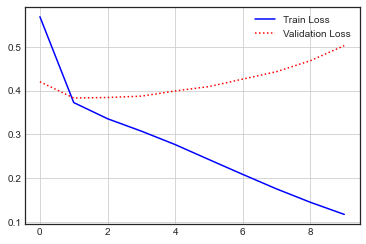

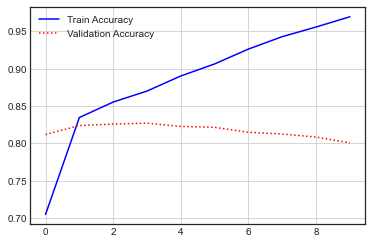

In [31]:
plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

# 모델평가

In [32]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.4986 - acc: 0.8010


[0.4986392557621002, 0.8009600043296814]

# 단어이 수를 늘린 후 재학습

In [34]:
num_words=2000
max_len=400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

pad_x_train_2 = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test_2 = pad_sequences(x_test, maxlen=max_len, padding='pre')

# 데이터 확인

In [37]:
print(x_train[0])
print(pad_x_train_2[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    

In [38]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           64000     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [44]:
history2 = model.fit(pad_x_train_2, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.4915 - acc: 0.7555 - val_loss: 0.3288 - val_acc: 0.8712
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2797 - acc: 0.8842 - val_loss: 0.3014 - val_acc: 0.8740
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2283 - acc: 0.9108 - val_loss: 0.3006 - val_acc: 0.8784
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1873 - acc: 0.9312 - val_loss: 0.3190 - val_acc: 0.8706
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1463 - acc: 0.9495 - val_loss: 0.3333 - val_acc: 0.8712
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1107 - acc: 0.9658 - val_loss: 0.3568 - val_acc: 0.8658
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0797 - acc: 0.9769 - val_loss: 0.3853 - val_acc: 0.8636
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

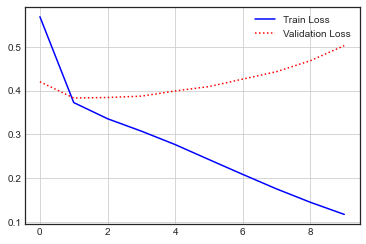

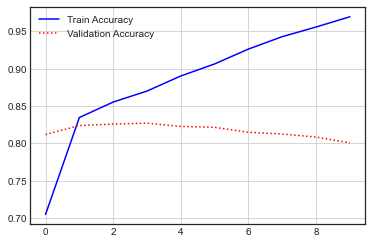

In [45]:
hist_dict2 = history.history
hist_dict.keys()

plt.plot(hist_dict2['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict2['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict2['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict2['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

In [46]:
model.evaluate(pad_x_test_2, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4831 - acc: 0.8500


[0.4830528199672699, 0.8500400185585022]

#### 위의 결과도 나쁘지 않으나 과적합이 되는 이유
        - 단어간 관계나 문장구조 등 의미적 연결을 고려하지 않음
        - 시퀀스 전체를 고려한 특성을 학습하는 것은 Embedding층 위에 RNN 층이나 1D 합성곱을 추가하는 것이 좋음

# Word2Vec
    - 2013년, Mikolov 와 동료들이 제안한 모형
    - 분류 등과 같이 별도의 레이블이 없이 특스트 자체만 있어돟 학습이 가능
    - Word2Vec의 방식
      주변 단어의 관계를 이용
        - CBOW(continuous bag-words)
            - 주변 단어의 임베딩을 더해서 대상단어를 예측
        - Skip-Gram
            - 대상 단어의 임베딩으로 주변단어를 예측
            - 일반적으로 CBOW보다 성능이 좋은 편
            - 한번에 여러 단어를 예측해야 하기 때문에 비효율적
              최근에는 negative sampling이라는 방법을 사용
                          

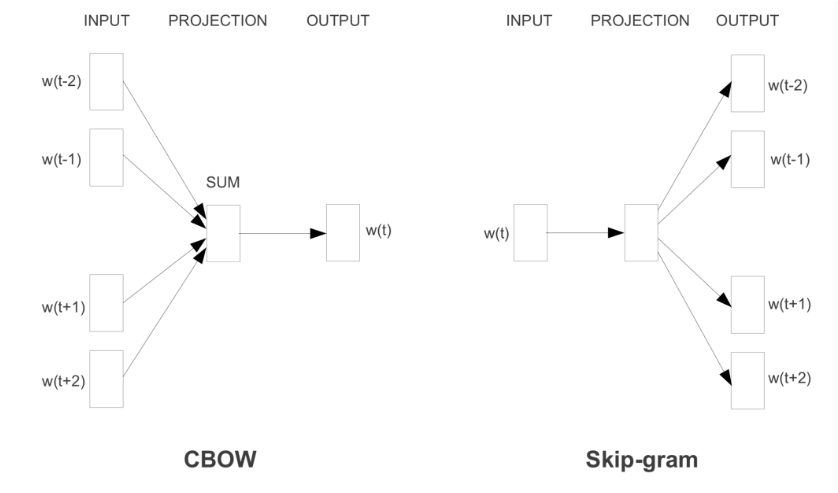

In [52]:

from IPython.display import Image

Image("C:\\Users\\ysbri\\Downloads\\Nano_4기\\4기\\CBOW & Skip-Gram.PNG")

# T-SNE
    - T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 차원축소 알고리즘
    - 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 이  T-SNE 알고리즘을 많이 이용
    - t-sne는 가장 먼저 원 공간의 데이터 유사도와 임베딩 공간의 데이터 유사도를 정의 

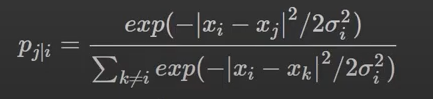

In [53]:
from IPython.display import Image

Image("C:\\Users\\ysbri\\Downloads\\Nano_4기\\4기\\T-SNE.PNG")

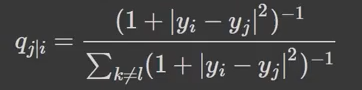

In [54]:
from IPython.display import Image

Image("C:\\Users\\ysbri\\Downloads\\Nano_4기\\4기\\T-SNE_2.PNG")

In [57]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                               remove=('header', 'footers', 'quotes'))

documents = dataset.data

print(len(documents))
documents[2]

11314


"From: bc744@cleveland.Freenet.Edu (Mark Ira Kaufman)\nSubject: Re: rejoinder. Questions to Israelis\nOrganization: Case Western Reserve University, Cleveland, Ohio (USA)\nLines: 38\nNNTP-Posting-Host: thor.ins.cwru.edu\n\n\n   Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have to start asking the\nsame sort of questions of Arab countries as well.  You realize it\nwould not work, as the Arab countries' treatment of Jews over the\nlast several decades is so bad that your fixation on Israel would\nbegin to look like the biased attack that it is.\n\n   Everyone in this group recognizes that your stupid 'Center for\nPolicy Research' is nothing more than a fancy name for some bigot\nwho hates Israel."

In [70]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return d

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def tokenize(d):
    return word_tokenize(d) 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ysbri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ysbri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
import pandas as pd

news_df = pd.DataFrame({'article':documents})
len(news_df)

11314

In [72]:
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))

11314


In [73]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        From: ab4z@Virginia.EDU ("Andi Beyer")\nSubjec...
1        From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSu...
2        From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...
3        From: ray@ole.cdac.com (Ray Berry)\nSubject: C...
4        From: kkeller@mail.sas.upenn.edu (Keith Keller...
                               ...                        
11309    From: adams@bellini.berkeley.edu (Adam L. Schw...
11310    From: levin@bbn.com (Joel B Levin)\nSubject: R...
11311    From: tedward@cs.cornell.edu (Edward [Ted] Fis...
11312    From: mori@volga.mfd.cs.fujitsu.co.jp (Tsuyosh...
11313    From: marc@yogi.austin.ibm.com (Marc J. Stephe...
Name: article, Length: 11314, dtype: object

In [74]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        from: ab4z@virginia.edu ("andi beyer") subject...
1        from: timmbake@mcl.ucsb.edu (bake timmons) sub...
2        from: bc744@cleveland.freenet.edu (mark kaufma...
3        from: ray@ole.cdac.com (ray berry) subject: cl...
4        from: kkeller@mail.sas.upenn.edu (keith keller...
                               ...                        
11309    from: adams@bellini.berkeley.edu (adam schwart...
11310    from: levin@bbn.com (joel levin) subject: sele...
11311    from: tedward@cs.cornell.edu (edward [ted] fis...
11312    from: mori@volga.mfd.cs.fujitsu.co.jp (tsuyosh...
11313    from: marc@yogi.austin.ibm.com (marc stephenso...
Name: article, Length: 11314, dtype: object

In [75]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.to_list()

In [77]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis = 0)
print(len(news_texts))

11314


# Gensim을 이용한 Word2Vec